# Group 15 Problem Set 3

## Preliminaries

In [6]:
import os
os.chdir("/users/jamie/Anaconda")
import numpy as np
import statsmodels.api as sm
import  matplotlib.pyplot as plt
import seaborn as sns
from data_functions_albert import gini 
import quantecon as qe
import warnings
warnings.filterwarnings('ignore')

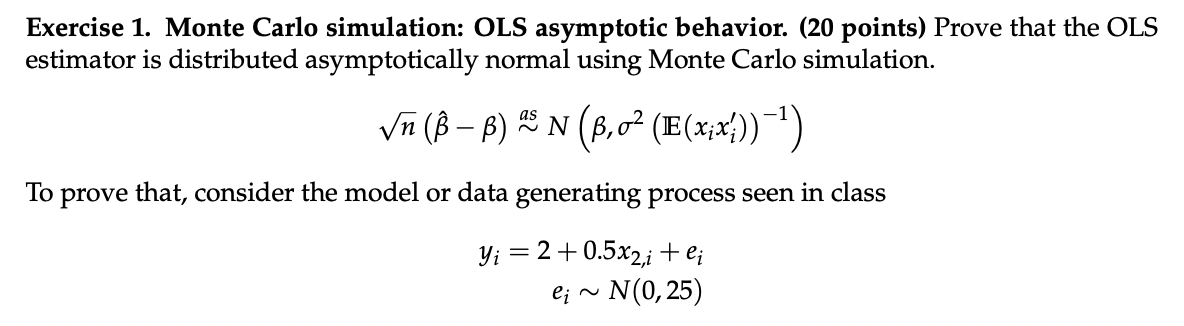

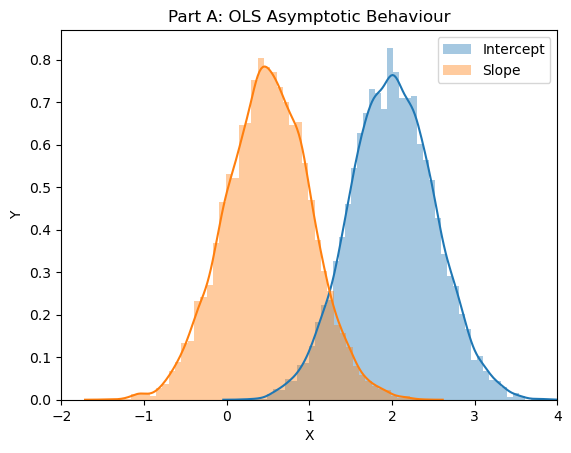

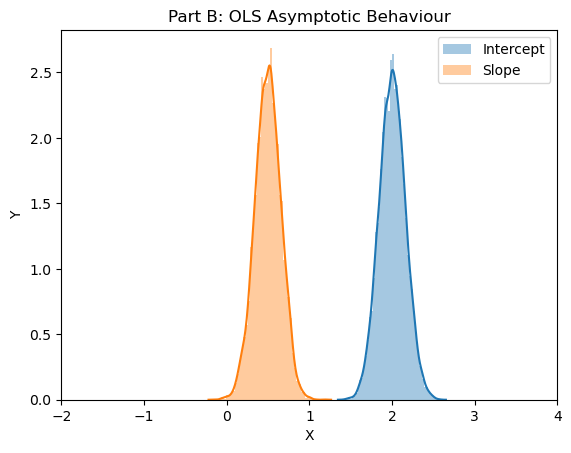

In [8]:
#Part A
N=100
sigma_e=5
T=10000

def montecarlo(T,N,sigma_e):
    array1=np.zeros((T,2))
    for i in range(T):
        x2=np.random.normal(0,1,N)
        e=np.random.normal(0,sigma_e,N)
        y1 = 2 + 0.5*x2 +e
        X = sm.add_constant(x2)
        ols1 = sm.OLS(y1,X).fit()
        array1[i,:]=ols1.params
    return array1

function=montecarlo(T,N,sigma_e)

fig, ax = plt.subplots()
sns.distplot(function[:, 0], bins=50, label='Intercept')
sns.distplot(function[:, 1], bins=50, label='Slope')
plt.title('Part A: OLS Asymptotic Behaviour')
plt.xlim(-2,4)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
    
#Part B
N=1000
sigma_e=5
T=10000

def montecarlo(T,N,sigma_e):
    array1=np.zeros((T,2))
    for i in range(T):
        x2=np.random.normal(0,1,N)
        e=np.random.normal(0,sigma_e,N)
        y1 = 2 + 0.5*x2 +e
        X = sm.add_constant(x2)
        ols1 = sm.OLS(y1,X).fit()
        array1[i,:]=ols1.params
    return array1

function=montecarlo(T,N,sigma_e)

fig, ax = plt.subplots()
sns.distplot(function[:, 0], bins=50, label='Intercept')
sns.distplot(function[:, 1], bins=50, label='Slope')
plt.title('Part B: OLS Asymptotic Behaviour')
plt.xlim(-2,4)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


The asymptotic distributions become more tightly distributed around the mean. With a higher N, a random sample from the distribution is more likely to be approximately the value of the true beta.

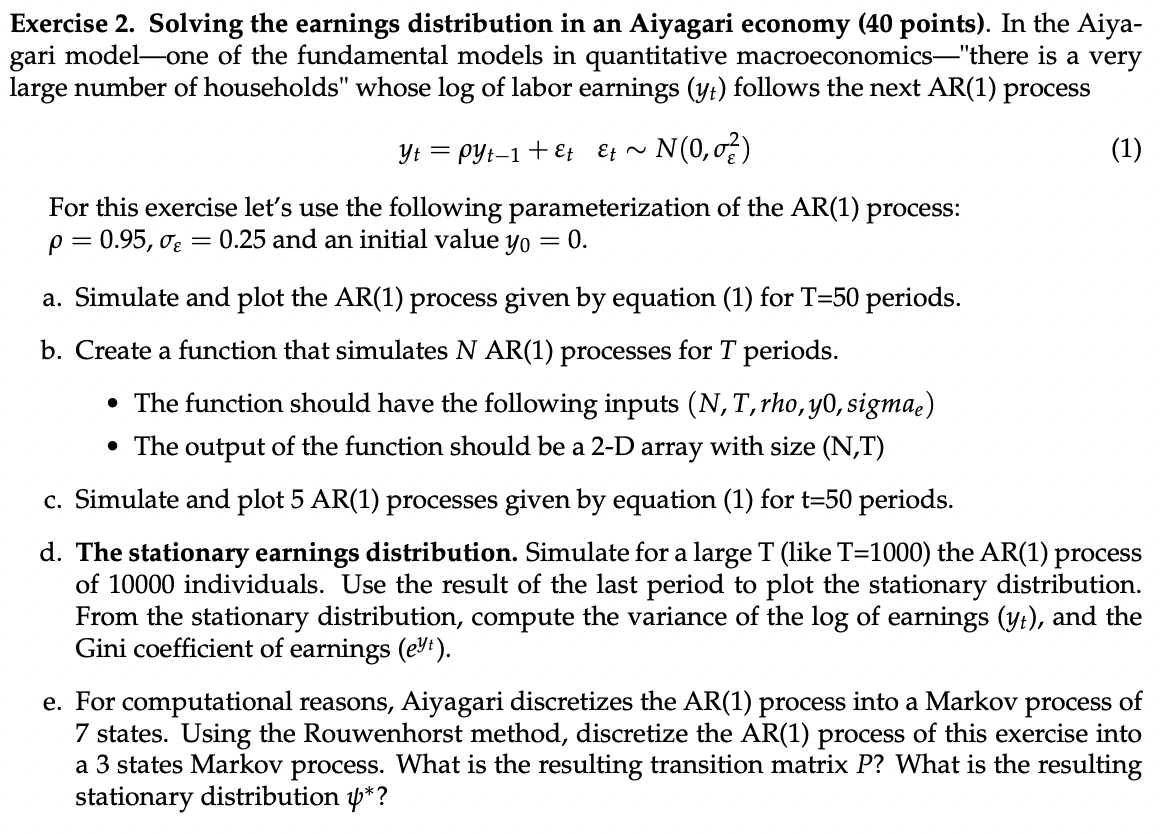

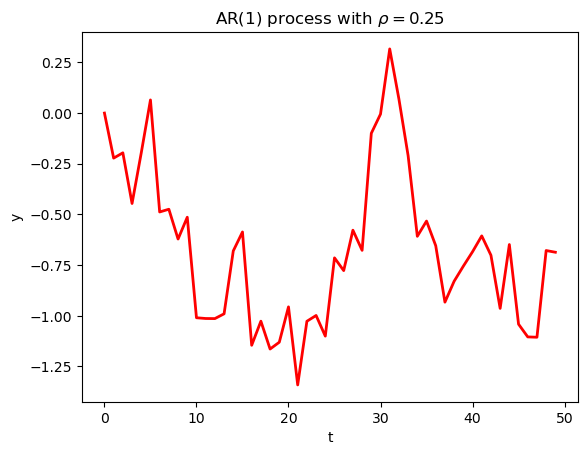

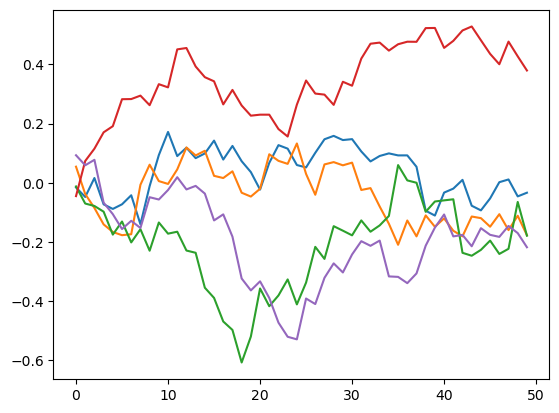

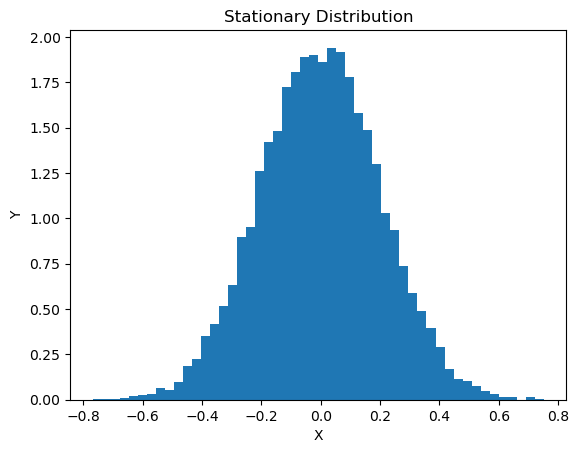

the gini coeffiecient of the last period is 0.1135410851077286
the variance of the log of the last period is 0.0406764092713982

Stationary Distribution:
 [[0.25 0.5  0.25]]
Transition Matrix:
 [[0.390625 0.46875  0.140625]
 [0.234375 0.53125  0.234375]
 [0.140625 0.46875  0.390625]]


In [18]:
#Part A
T=50
def ar_1(T, rho=0.95, y0=0, sigma_e=0.25):
    y=np.empty(T)
    y[0]=0
    for i in range(1,T):
        e=np.random.normal(0,sigma_e,1)
        y[i]=rho*y[i-1]+e
    return y
function=ar_1(T,rho=0.95)
fig, ax = plt.subplots()
ax.plot(range(0,T), function, linewidth=2.0, color='r')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.set_title(r'AR(1) process with $\rho=0.25$')
plt.show()

#Part B
Ytvalues2 = []
T = 50
rho = 0.95
y0 = 0
sigmae = 0.25

def ar1(N,T,rho,y0,sigmae):
    global Ytvalues2
    Ytvalues2 = []
    for N_value in range(N):
        y0 = 0
        for i in range(T):
            e = np.random.normal(0,(sigmae)**2)
            Yt = rho*y0 + e
            Ytvalues2.append(Yt)
            y0 = Yt
    Ytvalues2 = np.array(Ytvalues2)
    Ytvalues2 = Ytvalues2.reshape(N,T)
    return Ytvalues2

#Part C
N = 5
T = 50
ar1(N,T,rho,y0,sigmae)

for i in range(N):
    plt.plot(Ytvalues2[i,:])
    
#Part D
T=1000
N=10000

ar1(N,T,rho,y0,sigmae)
last = Ytvalues2[:,-1]
plt.figure()
plt.hist(last, bins=50, density=True)
plt.title("Stationary Distribution")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

var_earnings = np.var(last)
gini_earnings = gini(np.exp(last))
print('the gini coeffiecient of the last period is', gini_earnings)
print('the variance of the log of the last period is', var_earnings)

#Part E
n = 1000 # number of states
rho = 0.95 # autoregressive parameter
sigma = 0.25 # standard deviation of the error term

mean = np.mean(Ytvalues2)
mc_ar1 = qe.rouwenhorst(n=3, sigma=0.25, ybar = mean, rho=0.25)
P1 = mc_ar1.P
psi1_star = mc_ar1.stationary_distributions
y1_values = mc_ar1.state_values

print("\nStationary Distribution:\n", psi1_star)
print("Transition Matrix:\n", P1)

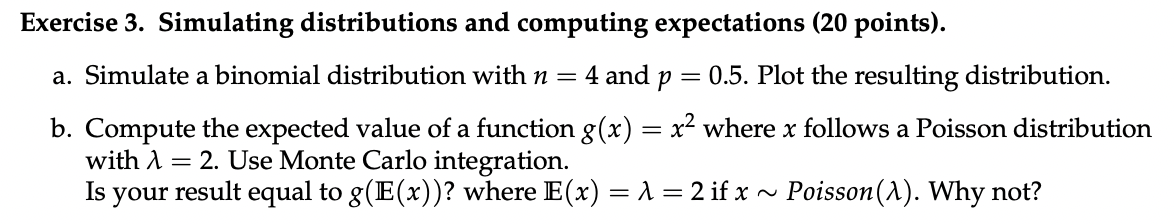

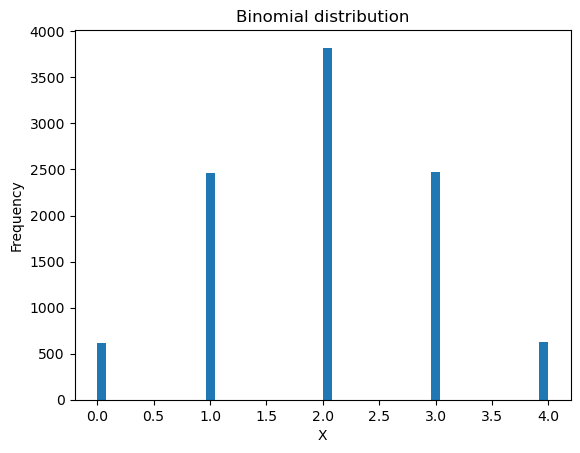

The expected value is 5.97076


In [11]:
#Part A
p=0.5
n=4
binomial=np.random.binomial(n,p,10000)
plt.hist(binomial, bins=50)
plt.title('Binomial distribution')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.show()

#Part B
lam=2
N=100000
def g(x):
    return x**2
def monte_carlo_integration(g, lam, N):
    #generate samples using poisson distribution
    poisson=np.random.poisson(lam, N)
    x=g(poisson)
    return np.mean(x)
expected_value=monte_carlo_integration(g, lam, N)
print('The expected value is', expected_value)

Part B Comment: g(E(x)) where x=2 is g(2)=4. This is not equivalent to our computed expected value. This is due to the fact that E(g(x)) does not equal g(E(x)). Computing E(g(x)) is done through computing the average across many samples, whereas g(E(x)) is evaluated at the finite point x=2.
The distribution is skewed to the right due to the fact that this is a poisson distribution. If this was a normal distribution, the mean and expected values would be the same.

## Exercise 4

the variance of y is 5618683.043299939
the mean of y is 2502.5611987542275
the gini coefficient of y is 0.42953852088057887
the variance of C_i is 2364287.5764310188
the mean of C_i is 2248.2810026968004
the gini coefficient of C_i is 0.3164488928092113


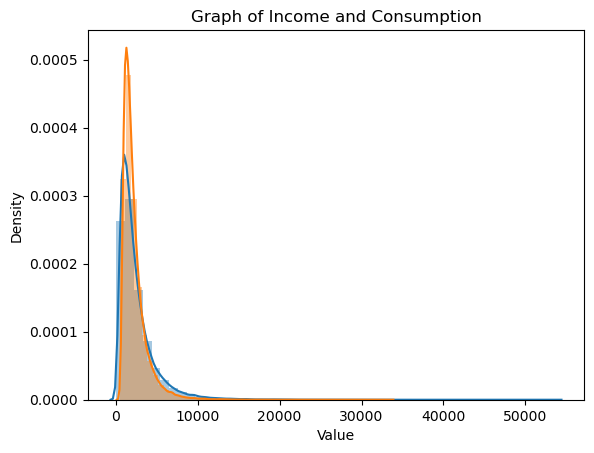

In [12]:
#Part A
mu=7.5
sigma=0.8
N=100000
#Generate log(y)
logy=np.random.normal(mu, sigma, N)
#Take exponents to get y
y=np.exp(logy)
#Compute mean, variance and gini
var_y=np.var(y)
mean_y=np.mean(y)
gini_y=gini(y)
print('the variance of y is', var_y)
print('the mean of y is', mean_y)
print('the gini coefficient of y is', gini_y)


#Part B
C_i=(y**0.8)+0.5*y+500
mean_C_i=np.mean(C_i)
var_C_i=np.var(C_i)
gini_C_i=gini(C_i)
print('the variance of C_i is', var_C_i)
print('the mean of C_i is', mean_C_i)
print('the gini coefficient of C_i is', gini_C_i)

#Part C
sns.distplot(y, bins=50, label='Income')
sns.distplot(C_i, bins=50, label='Consumption')
plt.title('Graph of Income and Consumption')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()